<a href="https://colab.research.google.com/github/Carlos3du/top_streamed_musics2023_analises/blob/main/trabalho_avd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informações e Tratamento dos Dados**

https://emastered.com/pt/blog/what-is-tempo-in-music\

Classificação dos intervalos em relação ao BPM

Classificar os artistas em Generos musicais a partir da classificação do BPM

## **Dicionário dos Dados**




| Nome da Coluna          | Descrição                                                                 |
|-------------------------|---------------------------------------------------------------------------|
| track_name              | nome da música                                                            |
| artist(s)_name          | nome do(s) artista(s) da música                                           |
| artist_count            | número de artistas contribuindo para a música                             |
| released_year           | ano de lançamento da música                                               |
| released_month          | mês de lançamento da música                                               |
| released_day            | dia do mês de lançamento da música                                        |
| in_spotify_playlists     | número de playlists do Spotify em que a música está incluída              |
| in_spotify_charts       | presença e posição da música nas paradas do Spotify                       |
| streams                 | número total de streams no Spotify                                        |
| in_apple_playlists      | número de playlists da Apple Music em que a música está incluída          |
| in_apple_charts         | presença e posição da música nas paradas da Apple Music                   |
| in_deezer_playlists      | número de playlists do Deezer em que a música está incluída               |
| in_deezer_charts        | presença e posição da música nas paradas do Deezer                        |
| in_shazam_charts        | presença e posição da música nas paradas do Shazam                        |
| bpm                     | Batidas por Minuto, uma medida do tempo da música                         |
| key                     | tonalidade da música                                                     |
| mode                    | modo da música (Maior ou Menor)                                           |
| danceability_%          | porcentagem indicando quão adequada é a música para dançar                |
| valence_%               | positividade do conteúdo musical da música                                |
| energy_%                | nível percebido de energia da música                                      |
| acousticness_%          | quantidade de som acústico na música                                      |
| instrumentalness_%      | quantidade de conteúdo instrumental na música                             |
| liveness_%              | presença de elementos de performance ao vivo                              |
| speechiness_%           | quantidade de palavras faladas na música                                  |




## **Tratamento dos Dados**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import seaborn as sns
from google.colab import drive
import plotly.graph_objects as go
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr

In [ ]:
url = "/content/spotify-2023.csv"

In [ ]:
drive.mount('/content/gdrive')
data_set = pd.read_csv('/content/gdrive/Shareddrives/analise_de_dados/spotify-2023.csv', encoding='ISO-8859-1')
data_set.head()

Mounted at /content/gdrive


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

<Axes: >

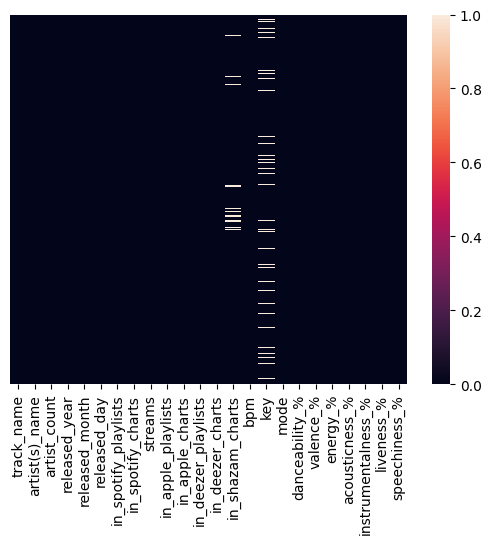

In [ ]:
# Identificando celulas vazias
sns.heatmap(data_set.isnull(), yticklabels=False)



In [ ]:
# Inserindo dados "substitutos" nas células nulas identificadas

ds = data_set
ds['in_shazam_charts'] = data_set['in_shazam_charts'].fillna(0)
ds['key'] = data_set['key'].fillna('Unknow')

<Axes: >

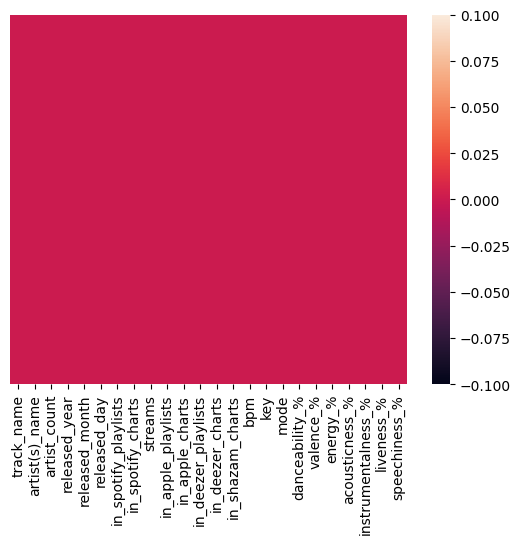

In [ ]:
sns.heatmap(ds.isnull(), yticklabels=False)

In [ ]:
# Verificar se há dados duplicados no dataset
ds.duplicated().sum()

0

In [ ]:
# Removendo dados duplicados
spotify_data = ds.drop_duplicates(subset='track_name')

In [ ]:
# Filtrar a linha pela música e artista
linha_especifica = spotify_data[(spotify_data['track_name'] == 'Love Grows (Where My Rosemary Goes)') &
                              (spotify_data['artist(s)_name'] == 'Edison Lighthouse')]

# Exibir os dados da linha
linha_especifica

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [ ]:
# Substituir o valor na coluna 'streams' pelo valor de 'in_spotify_playlists'
spotify_data.loc[(spotify_data['track_name'] == 'Love Grows (Where My Rosemary Goes)') &
               (spotify_data['artist(s)_name'] == 'Edison Lighthouse'), 'streams'] = spotify_data['in_spotify_playlists']

# Verificar se a alteração foi realizada
spotify_data[(spotify_data['track_name'] == 'Love Grows (Where My Rosemary Goes)') &
           (spotify_data['artist(s)_name'] == 'Edison Lighthouse')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,2877,16,...,110,A,Major,53,75,69,7,0,17,3


In [ ]:
# Converter o tipo do dado da coluna 'streams' para o tipo int64
spotify_data['streams'] = spotify_data['streams'].astype('int64')

# Verificar se a conversão foi realizada corretamente
spotify_data['streams'].dtypes

<ipython-input-12-3b6bc7cf7449>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data['streams'] = spotify_data['streams'].astype('int64')


dtype('int64')

In [ ]:
spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce')


<ipython-input-13-d96d7a04c524>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce')


# **Análise dos Dados - Parte 1**


### Analise descritiva do dataset

In [ ]:
# Analise descritiva de cada variável
data_set.describe().round()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0
mean,2.0,2018.0,6.0,14.0,5200.0,12.0,68.0,52.0,3.0,123.0,67.0,51.0,64.0,27.0,2.0,18.0,10.0
std,1.0,11.0,4.0,9.0,7898.0,20.0,86.0,51.0,6.0,28.0,15.0,23.0,17.0,26.0,8.0,14.0,10.0
min,1.0,1930.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,1.0,2020.0,3.0,6.0,875.0,0.0,13.0,7.0,0.0,100.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,1.0,2022.0,6.0,13.0,2224.0,3.0,34.0,38.0,0.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5542.0,16.0,88.0,87.0,2.0,140.0,78.0,70.0,77.0,43.0,0.0,24.0,11.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,672.0,275.0,58.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


### Análise qualitativa das músicas mais dançaveis


In [ ]:
# Musicas mais dançaveis
sub_set = spotify_data[['track_name', 'danceability_%']]
most_dancability = sub_set.sort_values(by='danceability_%', ascending=False, ignore_index=True).head(10)

most_dancability

,track_name,danceability_%
0,Peru,96
1,The Real Slim Shady,95
2,Starlight,95
3,Super Freaky Girl,95
4,CAIRO,95
5,Players,95
6,Ai Preto,95
7,Slut Me Out,94
8,sentaDONA (Remix) s2,93
9,Forgot About Dre,93


In [ ]:
# Grafico musicas mais dançaveis
fig_most_dancability = px.bar(most_dancability, y='track_name', x='danceability_%', color = 'danceability_%', text='danceability_%')
fig_most_dancability.update_traces(texttemplate='%{text:,}%', textposition='outside')
fig_most_dancability

### Analise quantitativa relacionando BPM com Dançabilidade

In [ ]:
correlation = spotify_data['bpm'].corr(data_set['danceability_%'])
print(f"Correlação entre BPM e danceability_%: {correlation}")

Correlação entre BPM e danceability_%: -0.14504387331329935


In [ ]:
fig = px.scatter(
    spotify_data,
    x='bpm',
    y='danceability_%',
    hover_name='track_name',  # Mostrar o nome da música ao passar o mouse
    title='Relação entre BPM e Danceability',
    labels={
        'bpm': 'BPM (Batidas por Minuto)',
        'danceability_%': 'Danceability (%)'
    }
)
fig.show()

### Análise qualitativa das músicas com mais elementos instrumentais

In [ ]:
top_10_elements = spotify_data.nlargest(10, 'instrumentalness_%')

fig = px.bar(top_10_elements,
             x='instrumentalness_%',
             y = 'track_name',
             orientation='h',
             color='instrumentalness_%',
             color_continuous_scale='viridis',
             text='instrumentalness_%',
             title='Top 10 músicas com mais elementos instrumentais',
             labels = {'instrumentalness_%' : 'Número de elementos musicais %', 'track_name': 'Nome da música'})

fig.update_traces(texttemplate='%{text:,}%', textposition='outside')

fig.show()

### Análise quantitativa dos cantores que mais utilizam elementos ao vivo.


In [ ]:
top_10_live = spotify_data.nlargest(10, 'liveness_%')

fig = px.bar(top_10_live,
             x='liveness_%',
             y = 'artist(s)_name',
             color='liveness_%',
             color_continuous_scale='viridis',
             orientation='h',
             text = 'liveness_%',
             title='Top 10 músicas com mais elementos ao vivo',
             labels = {'liveness_%' : 'Número de elementos ao vivo (%)', 'artist(s)_name': 'Nome do(a) artista'})

fig.update_traces(texttemplate='%{text:,}%', textposition='outside')
fig.show()

### Análise quantitativa dos elementos musicais e ao vivo ao longo dos anos (a partir de 2000)

In [ ]:

liveness_por_ano = spotify_data.groupby('released_year')['liveness_%'].sum().reset_index()
instruments_por_ano = spotify_data.groupby('released_year')['instrumentalness_%'].sum().reset_index()

df_merge = pd.merge(liveness_por_ano, instruments_por_ano, on='released_year', suffixes=('_liveness', '_instrumentalness'))

fig = px.bar(df_merge,
             x='released_year',
             y=['liveness_%', 'instrumentalness_%'],
             title='Elementos Musicais e ao Vivo ao Longo dos Anos (a partir de 2000)',
             labels={'released_year': 'Ano de Lançamento'},
             barmode='stack')

fig.update_yaxes(dtick=500)
fig.update_xaxes(range=[2000, liveness_por_ano['released_year'].max()], dtick=1)


fig.show()


### Relação entre Streams e Inclusão em Playlists no Spotify

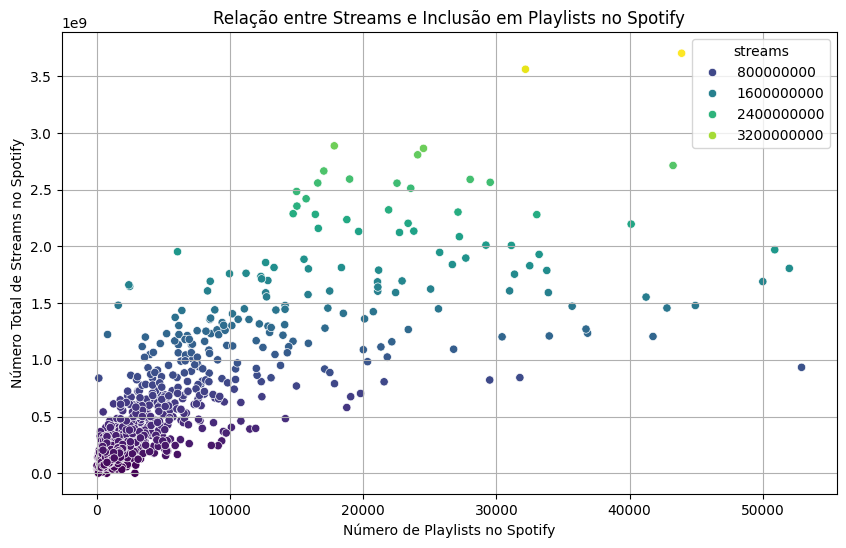

In [ ]:

#Gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='in_spotify_playlists', y='streams', data=spotify_data, hue='streams', palette='viridis')
plt.title('Relação entre Streams e Inclusão em Playlists no Spotify')
plt.xlabel('Número de Playlists no Spotify')
plt.ylabel('Número Total de Streams no Spotify')
plt.grid(True)
plt.show()

### Análise da relação entre danceability e outros caracteristicas musicais

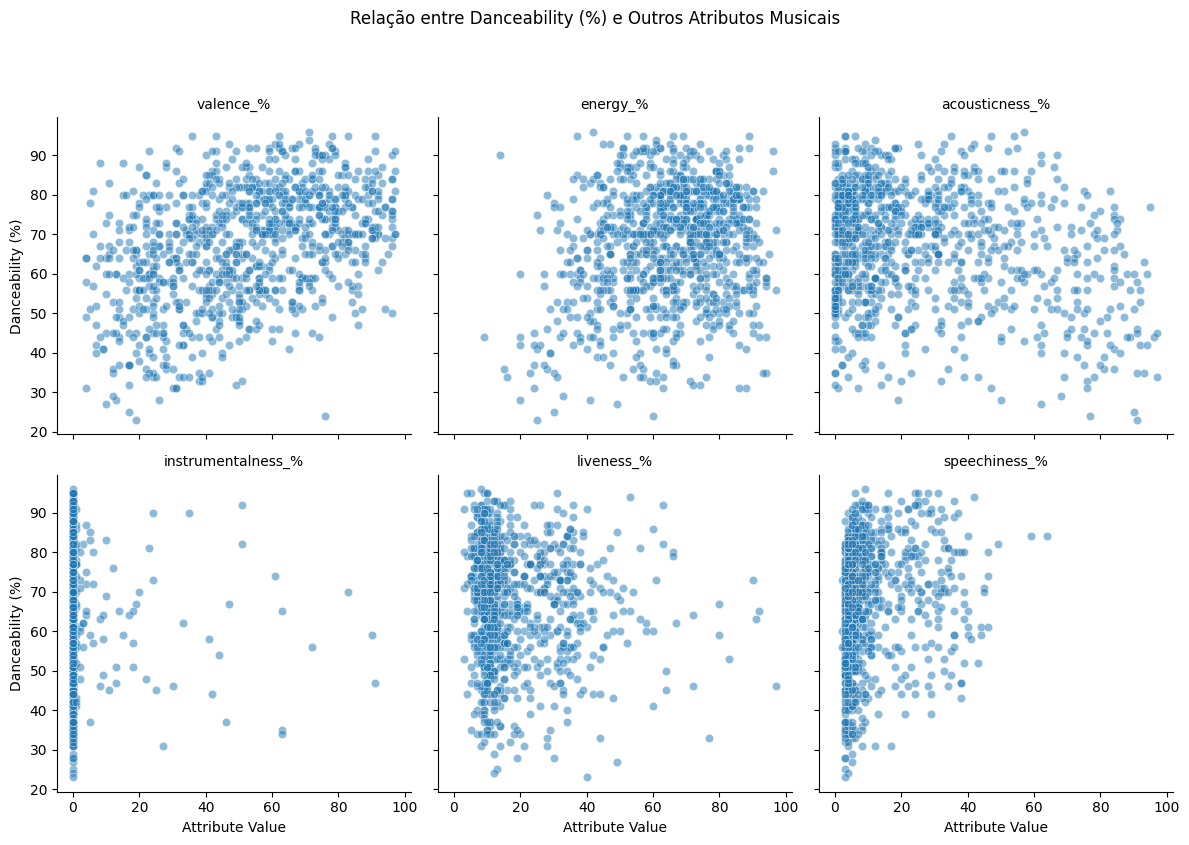

In [ ]:
melted_df = data_set.melt(id_vars=['danceability_%'],
                            value_vars=['valence_%', 'energy_%', 'acousticness_%',
                                        'instrumentalness_%', 'liveness_%', 'speechiness_%'],
                            var_name='Attribute', value_name='Value')

# Definição da paleta de cores para cada atributo


# Cria o FacetGrid
g = sns.FacetGrid(melted_df, col="Attribute", col_wrap=3, height=4)
g = g.map(sns.scatterplot, "Value", "danceability_%", alpha=0.5)

# Ajustar layout e adicionar título
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Attribute Value", "Danceability (%)")
g.fig.suptitle('Relação entre Danceability (%) e Outros Atributos Musicais', y=1.05)
plt.tight_layout()
plt.show()

*O gráfico apresesenta uma tendência positiva entre danceability_% e energy_%, valence_% e acousticness_%. Isso sugere que músicas mais enérgicas e positivas são mais dançáveis.*<br>
*Enquanto que há pouca ou nenhuma correlação positiva entre danceability_% e instrumentalness_%, liveness_%, e speechiness_%, o que pode indicar que essas características têm menos influência na dançabilidade de uma música.*<Br>
*Isto permite que possamos compreender como diferentes características musicais afetam a dançabilidade de uma música. Isso pode ser útil para produtores, DJs e curadores de playlists.*

### Correlação entre a quantidade de streams (em geral) e o número de buscas no Shazam

In [ ]:
spotify_data.loc[:, 'streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data.loc[:, 'in_shazam_charts'] = pd.to_numeric(spotify_data['in_shazam_charts'], errors='coerce')

corr_columns = ['in_shazam_charts', 'energy_%', 'acousticness_%', 'streams', 'valence_%', 'danceability_%']
corr_matrix = spotify_data[corr_columns].corr()

fig = px.imshow(corr_matrix,
                text_auto=True,  # Adiciona os valores dentro das células
                color_continuous_scale='RdBu_r',  # Escala de cores
                title="Correlação entre a quantidade de streams (em geral) e o número de buscas no Shazam")

fig.update_layout(
    width=800,
    height=800,
    hovermode='closest',
)
fig.show()

### Análise comparativa entre charts de diferentes plataformas

In [ ]:
grouped_apple= spotify_data.groupby('released_year')['in_apple_charts'].sum().reset_index()
grouped_spotfy= spotify_data.groupby('released_year')['in_spotify_charts'].sum().reset_index()
grouped_deezer= spotify_data.groupby('released_year')['in_deezer_charts'].sum().reset_index()


merged_df = pd.merge(grouped_apple, grouped_spotfy, on='released_year')

merged_df = pd.merge(merged_df, grouped_deezer, on='released_year')

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=merged_df['released_year'], y=merged_df['in_spotify_charts'],
        mode='lines',
        name='In Spotify Charts',
        line=dict(color='green'),
    )
)

fig.add_trace(
    go.Scatter(
        x=merged_df['released_year'], y=merged_df['in_apple_charts'],
        mode='lines',
        name='In Apple Charts',
        line=dict(color='red'),
    )
)

fig.add_trace(
    go.Scatter(
        x=merged_df['released_year'], y=merged_df['in_deezer_charts'],
        mode='lines',
        name='In Deezer Charts',
        line=dict(color='Blue'),
    )
)

fig.update_layout(
    title='Musicas lançadas ao longo dos anos em diferentes charts',
    xaxis_title='Ano de Lançamento',
    yaxis_title='Quantidade',
    showlegend=True,  # Garantir que a legenda esteja ativada
    legend_title_text='Elementos'  # Título da legenda
)

fig.update_yaxes(dtick=1000)
fig.update_xaxes(range=[2000, merged_df['released_year'].max()], dtick=1)

fig.show()

### Análise quantitativa dos Artistas mais tocados nas plataformas de música

In [ ]:
grouped_artists = spotify_data.groupby('artist(s)_name')['streams'].sum()


top_10_artists = grouped_artists.nlargest(10)


fig = px.bar(top_10_artists,
             y=top_10_artists.index,
             x=top_10_artists.values,
             title="Top 10 Artistas por Streams",
             color='streams',
             color_continuous_scale='viridis',
             labels={'y': "Artistas", 'x': "Streams"})


fig.update_layout(xaxis_title="Soma de Streams", yaxis_title="Artistas", showlegend=False)


fig.show()

### Análise de Streams por Quantidade de Artistas na Música

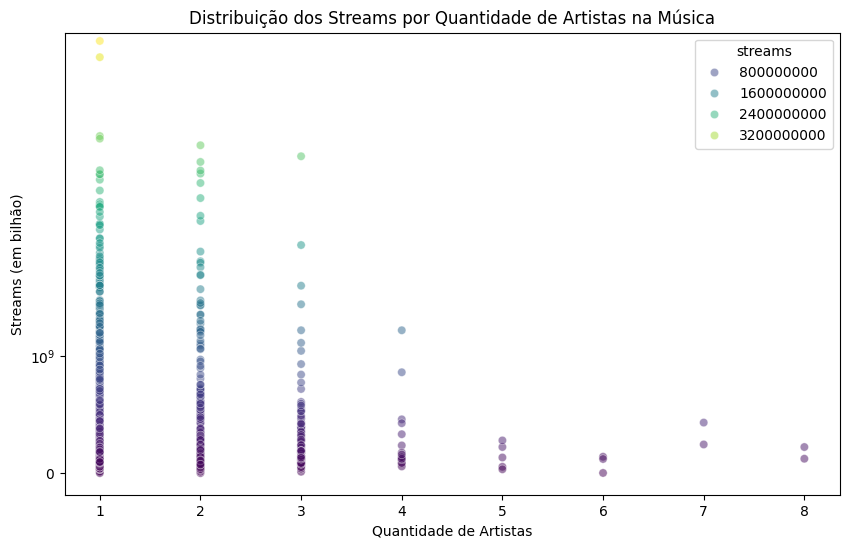

In [ ]:
# Artista vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_count', y='streams', data=spotify_data, alpha=0.5, hue='streams', palette='viridis')
plt.title('Distribuição dos Streams por Quantidade de Artistas na Música')
plt.ylabel('Streams (em bilhão)')
plt.yscale('symlog', linthresh=3.7e+09)
plt.xlabel('Quantidade de Artistas')
plt.show()

<ipython-input-28-49466d315b15>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




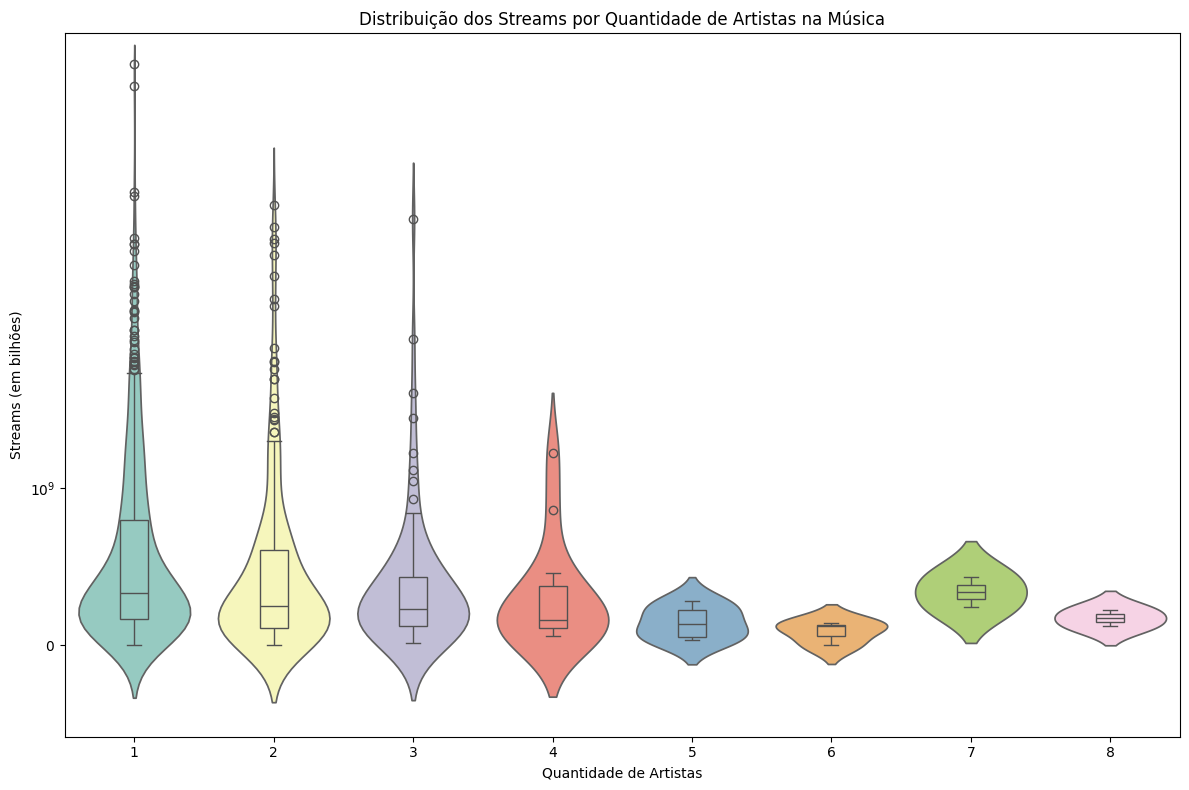

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='artist_count', y='streams', data=spotify_data, inner=None, palette="Set3")
sns.boxplot(x='artist_count', y='streams', data=spotify_data, whis=1.5, width=0.2, showcaps=True, boxprops={'facecolor':'None'}, showfliers=True)
plt.title('Distribuição dos Streams por Quantidade de Artistas na Música')
plt.ylabel('Streams (em bilhões)')
plt.yscale('symlog', linthresh=3.7e+09)
plt.xlabel('Quantidade de Artistas')
plt.tight_layout()
plt.show()


Realizamos a combinação dos gráficos **Boxplot** e **Violin Plot** para analisar a relação entre o número de artistas (representado por artist_count) e o número de streams.<Br>
- A parte central do boxplot mostra a mediana dos streams para cada contagem de artistas, com as bordas da caixa representando o primeiro e terceiro quartis. Isso permite identificar onde a maioria dos streams se concentra.<br>
- A sobreposição do violin plot ao boxplot proporciona a visão da densidade dos dados em torno da quantidade de artista na música. Onde o gráfico é mais largo, mais músicas tendem a ter aquela contagem específica de streams.<br><br>
Com base na análise do gráfico de Boxplot e Violin Plot, observamos que, embora haja algumas músicas com vários artistas têm um número significativamente alto de streams, não há uma relação evidente entre a contagem de artistas e o número de streams. Isso sugere que o sucesso de uma música em termos de streams não depende exclusivamente do número de artistas envolvidos, mas possivelmente de outros fatores como a qualidade da música, marketing, e timing de lançamento.

### Top 10 Músicas e Streams

In [ ]:
# top_musicas_artistas
top_musicas_artistas= spotify_data[['track_name','artist(s)_name','streams']].sort_values(by='streams',ascending=False).head(10)

# Criar plot
fig = px.bar(
    top_musicas_artistas,
    x='streams',
    y='track_name',
    text='streams',
    color='streams',
    color_continuous_scale='viridis',
    title="Top 10 Músicas com mais streams"
)

# Atualizar layout
fig.update_layout(
    xaxis_title="Número de Streams",
    yaxis_title="Nome das Músicas",
    title_font_size=22,
    title_font_family="Arial",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Update the traces
fig.update_traces(texttemplate='%{text:,}', textposition='outside')

# Show the plot
fig.show()

### Ano de lançamento das canções tocadas em 2023

In [ ]:


ano_mais_tocadas = spotify_data.groupby('released_year')['streams'].sum().reset_index()


fig = px.bar(ano_mais_tocadas,
             x='released_year',
             y='streams',
             title='Ano de lançamento das canções tocadas em 2023',
             labels={'released_year': 'Ano de Lançamento'})


fig.update_xaxes(range=[1970, ano_mais_tocadas['released_year'].max()], dtick=5)


### Listas as músicas lançadas antes de 2000

In [ ]:
# Filtrar as músicas lançadas antes do ano 2000
filtered_data = spotify_data[spotify_data['released_year'] < 2000]

# Ordenar os dados por ano de lançamento
sorted_data = filtered_data.sort_values(by='released_year')

# Selecionar apenas as colunas desejadas
result = sorted_data[['released_year', 'track_name', 'artist(s)_name']]

result.reset_index()

,index,released_year,track_name,artist(s)_name
0,439,1930,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth"
1,469,1942,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr..."
2,460,1946,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole
3,459,1952,A Holly Jolly Christmas - Single Version,Burl Ives
4,444,1957,Jingle Bell Rock,Bobby Helms
5,496,1957,Jingle Bells - Remastered 1999,Frank Sinatra
6,476,1958,It's Beginning to Look a Lot Like Christmas (w...,"Perry Como, The Fontane Sisters, Mitchell Ayre..."
7,443,1958,Rockin' Around The Christmas Tree,Brenda Lee
8,495,1958,Run Rudolph Run - Single Version,Chuck Berry
9,483,1959,Deck The Hall - Remastered 1999,Nat King Cole


# **Análise dos Dados -Parte 2**


Trazer todas as métricas abordadas em aula para uma amostra representativa do dataset, em torno de 30% da base, ou seja, a média, a mediana, o boxplot dos principais dados, a matriz de correlação da base, as estatísticas das distribuições e outros gráficos de suporte.

### **Pegando uma amostra de 30% do data set original**

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [ ]:
ds_amostra = data_set.sample(frac=0.3)
ds_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 71 to 857
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            286 non-null    object
 1   artist(s)_name        286 non-null    object
 2   artist_count          286 non-null    int64 
 3   released_year         286 non-null    int64 
 4   released_month        286 non-null    int64 
 5   released_day          286 non-null    int64 
 6   in_spotify_playlists  286 non-null    int64 
 7   in_spotify_charts     286 non-null    int64 
 8   streams               286 non-null    object
 9   in_apple_playlists    286 non-null    int64 
 10  in_apple_charts       286 non-null    int64 
 11  in_deezer_playlists   286 non-null    object
 12  in_deezer_charts      286 non-null    int64 
 13  in_shazam_charts      286 non-null    object
 14  bpm                   286 non-null    int64 
 15  key                   286 non-null    object

### **Métricas**

In [ ]:
# Analise descritiva de cada variável
data_set.describe().round()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0
mean,2.0,2018.0,6.0,14.0,5200.0,12.0,68.0,52.0,3.0,123.0,67.0,51.0,64.0,27.0,2.0,18.0,10.0
std,1.0,11.0,4.0,9.0,7898.0,20.0,86.0,51.0,6.0,28.0,15.0,23.0,17.0,26.0,8.0,14.0,10.0
min,1.0,1930.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,1.0,2020.0,3.0,6.0,875.0,0.0,13.0,7.0,0.0,100.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,1.0,2022.0,6.0,13.0,2224.0,3.0,34.0,38.0,0.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5542.0,16.0,88.0,87.0,2.0,140.0,78.0,70.0,77.0,43.0,0.0,24.0,11.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,672.0,275.0,58.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


In [ ]:
ds_amostra.describe().round()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0,286.0
mean,2.0,2018.0,6.0,14.0,5011.0,13.0,71.0,54.0,3.0,122.0,67.0,52.0,64.0,27.0,1.0,18.0,11.0
std,1.0,13.0,3.0,9.0,7779.0,21.0,90.0,55.0,7.0,28.0,14.0,24.0,18.0,25.0,6.0,15.0,10.0
min,1.0,1930.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,71.0,28.0,4.0,9.0,0.0,0.0,3.0,3.0
25%,1.0,2021.0,3.0,6.0,878.0,0.0,15.0,5.0,0.0,96.0,58.0,33.0,53.0,6.0,0.0,9.0,4.0
50%,1.0,2022.0,6.0,13.0,2112.0,3.0,36.0,39.0,0.0,123.0,70.0,53.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5433.0,17.0,94.0,94.0,2.0,139.0,78.0,72.0,77.0,42.0,0.0,23.0,13.0
max,7.0,2023.0,12.0,31.0,51979.0,115.0,532.0,275.0,58.0,202.0,95.0,97.0,97.0,96.0,63.0,97.0,46.0


### **Comparando Valores dos Data sets**

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Amostra', 'Dataset Completo'))


fig.add_trace(go.Box(y=ds_amostra['danceability_%'], name='danceability_%'), row=1, col=1)
fig.add_trace(go.Box(y=ds_amostra['valence_%'], name='valence_%'), row=1, col=1)
fig.add_trace(go.Box(y=ds_amostra['energy_%'], name='energy_%'), row=1, col=1)
fig.add_trace(go.Box(y=ds_amostra['acousticness_%'], name='acousticness_%'), row=1, col=1)
fig.add_trace(go.Box(y=ds_amostra['instrumentalness_%'], name='instrumentalness_%'), row=1, col=1)
fig.add_trace(go.Box(y=ds_amostra['liveness_%'], name='liveness_%'), row=1, col=1)
fig.add_trace(go.Box(y=ds_amostra['speechiness_%'], name='speechiness_%'), row=1, col=1)

fig.add_trace(go.Box(y=data_set['danceability_%'], name='danceability_%'), row=1, col=2)
fig.add_trace(go.Box(y=data_set['valence_%'], name='valence_%'), row=1, col=2)
fig.add_trace(go.Box(y=data_set['energy_%'], name='energy_%'), row=1, col=2)
fig.add_trace(go.Box(y=data_set['acousticness_%'], name='acousticness_%'), row=1, col=2)
fig.add_trace(go.Box(y=data_set['instrumentalness_%'], name='instrumentalness_%'), row=1, col=2)
fig.add_trace(go.Box(y=data_set['liveness_%'], name='liveness_%'), row=1, col=2)
fig.add_trace(go.Box(y=data_set['speechiness_%'], name='speechiness_%'), row=1, col=2)


fig.update_layout(showlegend=False, title_text="Comparação entre Métricas da Amostra e do Dataset Completo")
fig.update_traces(marker_color='purple')

fig.show()


### **Análise das métricas do número de elementos ao vivo**


In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=ds_amostra['liveness_%'], name='liveness_%', marker_color='purple'))
fig.update_layout(title='Boxplot do número de elementos ao vivo', width=1000, height=500)


fig.show()

### **Comparando métricas com e sem outliers**

In [ ]:
q1 = ds_amostra['liveness_%'].quantile(0.25)
q3 = ds_amostra['liveness_%'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
live_no_outliers = ds_amostra[(ds_amostra['liveness_%'] >= lower_bound) & (ds_amostra['liveness_%'] <= upper_bound)]

media_no_outliers = live_no_outliers['liveness_%'].mean()
mediana_no_outliers = live_no_outliers['liveness_%'].median()
media = ds_amostra['liveness_%'].mean()
mediana = ds_amostra['liveness_%'].median()

In [ ]:
fig = px.bar(x=['Média com Outliers', 'Média sem Outliers',  'Mediana com Outliers', 'Mediana sem Outliers'], y=[media,  media_no_outliers, mediana, mediana_no_outliers],
             color=['Média com Outliers', 'Média sem Outliers',  'Mediana com Outliers', 'Mediana sem Outliers'])

fig.update_layout(
    title='Comparação da Média e Mediana com e sem Outliers do Número de Elementos ao Vivo',
    xaxis_title='Métricas',
    yaxis_title='Valores',
    showlegend=False,
)

fig.show()

### **Analisando a distribuição de BPM com Estatísticas de Variabilidade**

In [ ]:
media_bpm = ds_amostra['bpm'].mean()
mediana_bpm = ds_amostra['bpm'].median()
dp_bpm = ds_amostra['bpm'].std()

In [ ]:

fig = go.Figure()

fig.add_trace(go.Histogram(x=ds_amostra['bpm'], name='Amostra'))

fig.update_layout(
    title='Distribuição de BPM ',
    xaxis_title='BPM',
    yaxis_title='Frequência',
    bargap=0.0,

)

fig.add_vline(x=media_bpm, line_width=2, line_dash="dash", line_color="red", annotation_text="Média", annotation_position="top right")
fig.add_vline(x=mediana_bpm, line_width=2, line_dash="dash", line_color="green", annotation_text="Mediana", annotation_position="top left")

fig.add_vline(x=media_bpm + dp_bpm , line_width=2, line_dash="dash", line_color="blue", annotation_text="Media + DP", annotation_position="top left")
fig.add_vline(x=media_bpm - dp_bpm , line_width=2, line_dash="dash", line_color="blue", annotation_text="Media - DP", annotation_position="top right")




fig.update_yaxes(range=[0, 80])
fig.update_traces(marker_line_width=1.5, marker_line_color='black')

fig.show()

A análise da estatísticas de variabilidade mostra que:
* Que a maioria das músicas tem um BPM em torno de 120.
* Que a distribuição da média e mediana são relativamente simétrica na maior parte do conjunto de dados.
* Que a variabilidade de BPMs da maioria das músicas está concentrada entre aproximadamente 90 e 150 BPM.

A análise revela que a maioria das músicas se encontra na faixa de 90 a 150 BPM, com uma concentração significativa por volta de 120 BPM. Existem algumas músicas com BPMs mais extremos, mas essas são menos frequentes. Isso pode indicar que músicas em torno de 120 BPM são mais populares ou comuns, com poucas exceções muito rápidas ou muito lentas.Por isso, requer mais analises

### **Análise da média e mediana da quantidade de streams por artista**

In [ ]:
ds_amostra['streams'] = pd.to_numeric(ds_amostra['streams'], errors='coerce')
streams_art = ds_amostra.groupby('artist(s)_name')['streams'].sum().reset_index()
streams_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   artist(s)_name  237 non-null    object
 1   streams         237 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
streams_art = streams_art.sort_values(by='streams', ascending=False)
streams_art.head(10)

,artist(s)_name,streams
215,The Weeknd,4283977187
64,Ed Sheeran,3792179037
211,Taylor Swift,3445150612
14,Bad Bunny,3404059556
67,Eminem,2929223070
118,Lewis Capaldi,2887241814
169,"Post Malone, Swae Lee",2808096550
97,"Justin Bieber, The Kid Laroi",2665343922
217,"The Weeknd, Daft Punk",2565529693
78,Glass Animals,2557975762


In [ ]:
media = streams_art['streams'].mean()
mediana = streams_art['streams'].median()

In [ ]:
streams_art = streams_art.head(40)

In [ ]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=streams_art['artist(s)_name'],
    y=streams_art['streams'],
    marker_color=streams_art['streams'],
    name='Streams',
))

fig.add_trace(go.Scatter(
    x = streams_art['artist(s)_name'],
    y=[media] * len(streams_art['artist(s)_name']),
    mode='lines',
    name='Média',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x = streams_art['artist(s)_name'],
    y=[mediana] * len(streams_art['artist(s)_name']),
    mode='lines',
    name='Mediana',
    line=dict(color='green')
))


fig.update_layout(
    title='Artistas e Grupos com mais Streams',
    xaxis_title='Artistas',
    yaxis_title='Streams',
)


fig.update_xaxes(tickangle=45)

fig.show()

### Teorema do limite central


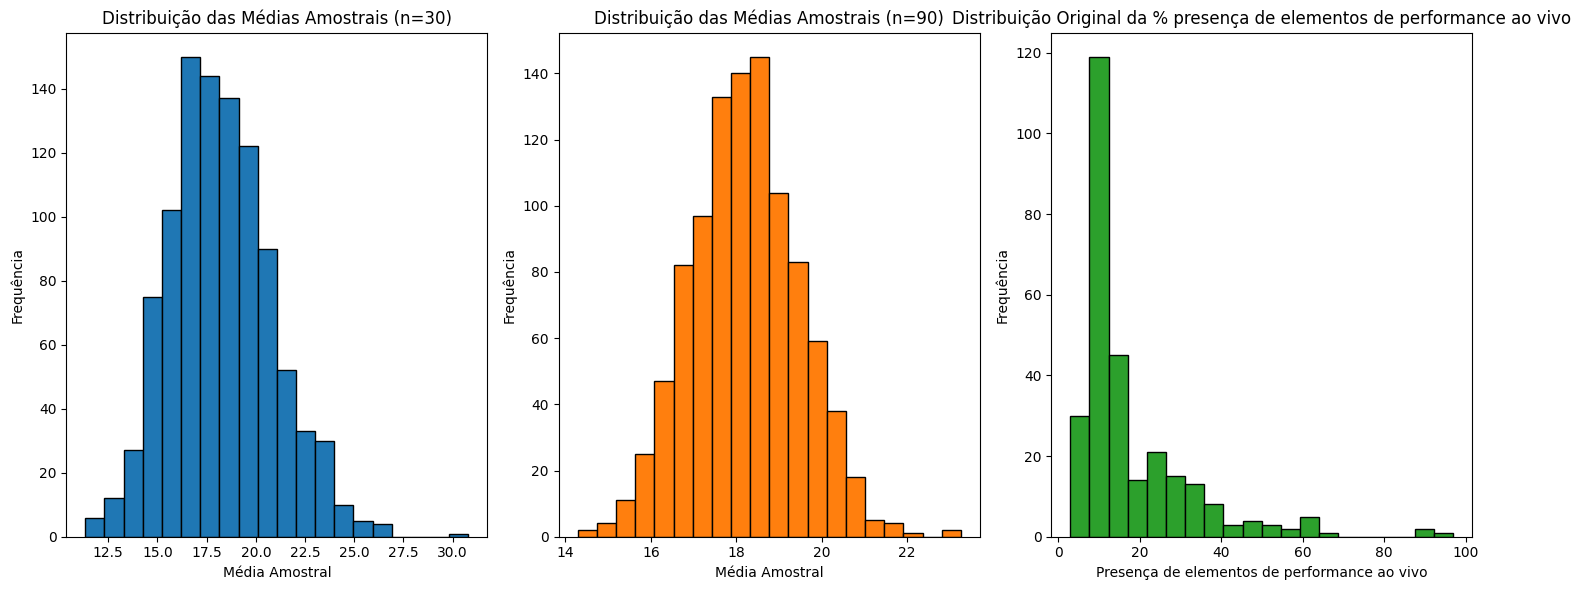

In [ ]:
# Cálculo das médias amostrais com amostras de tamanho 30 e 90
sample_means_30 = [ds_amostra['liveness_%'].sample(30).mean() for _ in range(1000)]
sample_means_90 = [ds_amostra['liveness_%'].sample(90).mean() for _ in range(1000)]

# Gráficos comparativos
plt.figure(figsize=(15, 6))

# Distribuição das médias amostrais (n=30)
plt.subplot(1, 3, 1)
plt.hist(sample_means_30, bins=20, edgecolor='black', color='#1f77b4')
plt.title('Distribuição das Médias Amostrais (n=30)')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')

# Distribuição das médias amostrais (n=90)
plt.subplot(1, 3, 2)
plt.hist(sample_means_90, bins=20, edgecolor='black', color='#ff7f0e')
plt.title('Distribuição das Médias Amostrais (n=90)')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')

# Distribuição original de todas as idades
plt.subplot(1, 3, 3)
plt.hist(ds_amostra['liveness_%'], bins=20, edgecolor='black', color='#2ca02c')
plt.title('Distribuição Original da % presença de elementos de performance ao vivo')
plt.xlabel('Presença de elementos de performance ao vivo')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Análise de Distribuições

> 1. Histograma e Curva de Densidade
> 2. Boxplot e Violin Plot
> 3. QQ-Plot
> 4. Distribuição das Variáveis por Classe


<ipython-input-49-5eeddafc2480>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




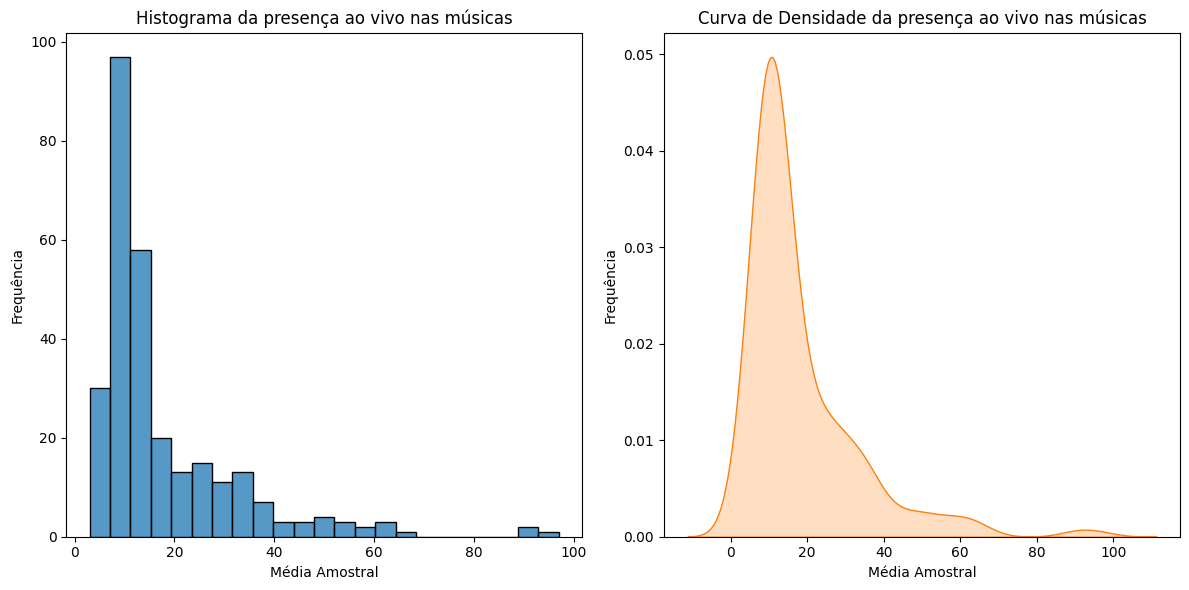

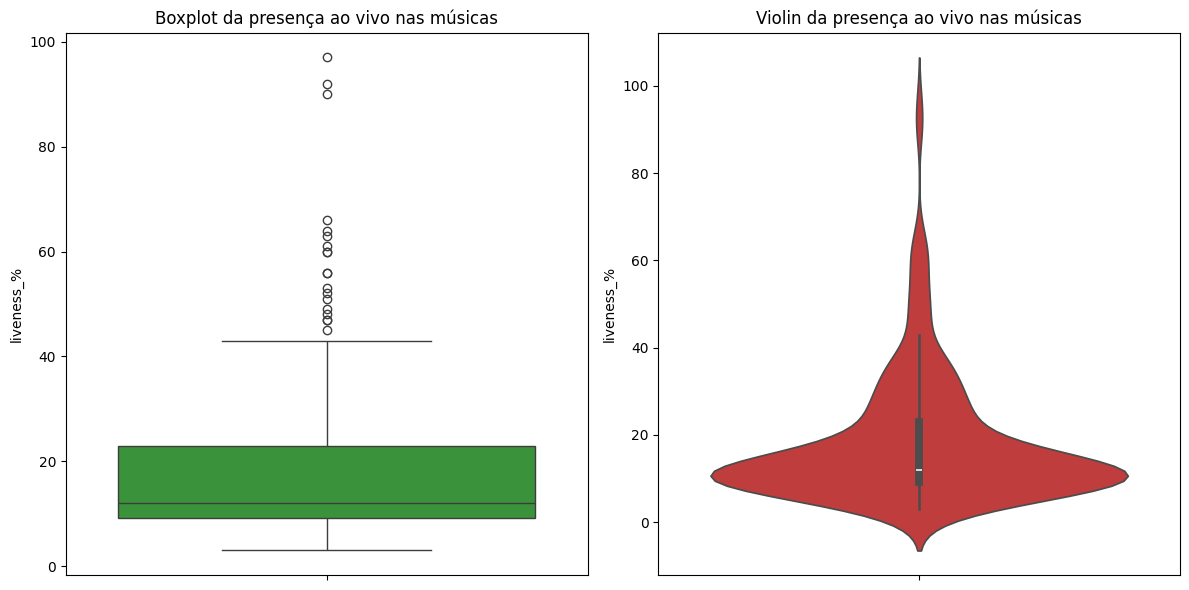

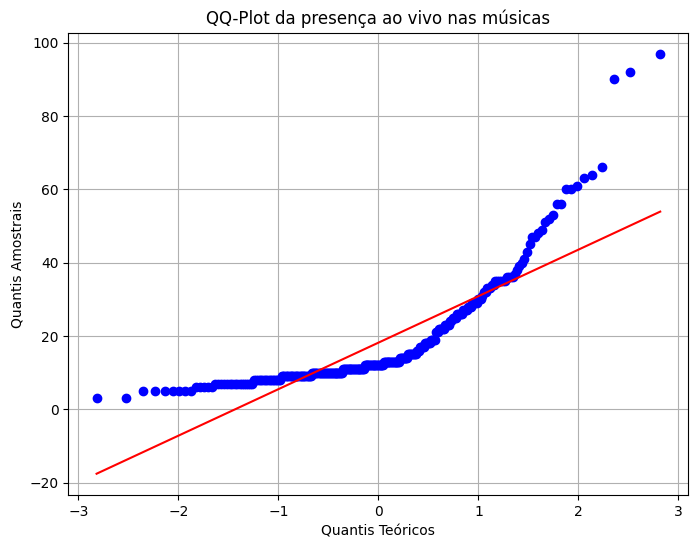

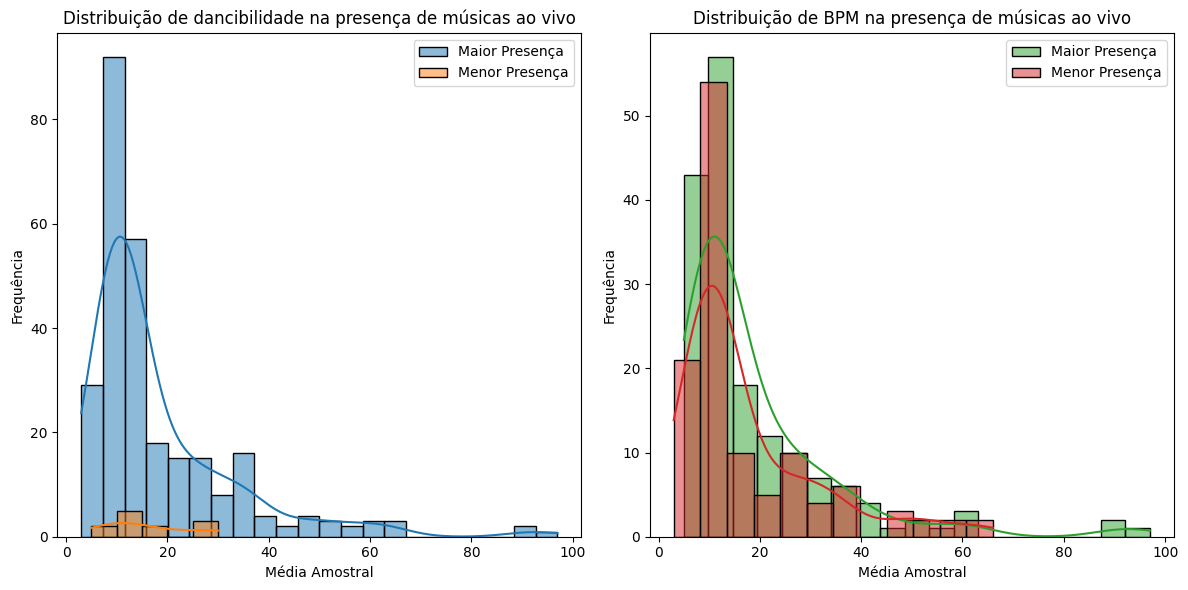

In [ ]:
# 1. Histograma e Curva de Densidade
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(ds_amostra['liveness_%'], kde=False, color='#1f77b4', edgecolor='black')
plt.title('Histograma da presença ao vivo nas músicas')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')

# Curva de Densidade
plt.subplot(1, 2, 2)
sns.kdeplot(ds_amostra['liveness_%'], shade=True, color='#ff7f0e')
plt.title('Curva de Densidade da presença ao vivo nas músicas')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# 2. Boxplot e Violin Plot
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='liveness_%', data=ds_amostra, color='#2ca02c')
plt.title('Boxplot da presença ao vivo nas músicas')


# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(y='liveness_%', data=ds_amostra, color='#d62728')
plt.title('Violin da presença ao vivo nas músicas')

plt.tight_layout()
plt.show()

# 3. QQ-Plot
plt.figure(figsize=(8, 6))
stats.probplot(ds_amostra['liveness_%'], dist="norm", plot=plt)
plt.title('QQ-Plot da presença ao vivo nas músicas')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Amostrais')
plt.grid(True)
plt.show()

# 4. Distribuição das Variáveis por Classe
plt.figure(figsize=(12, 6))

# Dancibilidade na presença de músicas ao vivo
plt.subplot(1, 2, 1)
sns.histplot(ds_amostra[ds_amostra['danceability_%'] >= 40]['liveness_%'], kde=True, color='#1f77b4', label='Maior Presença')
sns.histplot(ds_amostra[ds_amostra['danceability_%'] < 40]['liveness_%'], kde=True, color='#ff7f0e', label='Menor Presença')
plt.title('Distribuição de dancibilidade na presença de músicas ao vivo')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.legend()

# BPM na Presença ao vivo nas músicas
plt.subplot(1, 2, 2)
sns.histplot(ds_amostra[ds_amostra['bpm'] >= 120]['liveness_%'], kde=True, color='#2ca02c', label='Maior Presença')
sns.histplot(ds_amostra[ds_amostra['bpm'] < 120]['liveness_%'], kde=True, color='#d62728', label='Menor Presença')
plt.title('Distribuição de BPM na presença de músicas ao vivo')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

1. **Histograma e Curva de Densidade da Presença ao Vivo nas Músicas**:
   - As análises mostram que a maioria das músicas possuem baixa presença de elementos ao vivo, uma concentração em torno de 10%. Que a distribuição é assimétrica, com uma longa cauda à direita, o que pode indicar que há algumas músicas com uma alta presença ao vivo ou presença de outliers.

2. **Boxplot e Gráfico de Violino da Presença ao Vivo nas Músicas**:
   - A análise do gráfico mostra que a presença ao vivo é moderada, mas há exceções com valores muito altos e alguns outliers que chegam perto de 100%.
   - E que a densidade das músicas se concentra nos valores mais baixos de "liveness", com a densidade diminuindo à medida que a presença ao vivo aumenta, mas ainda destacando os valores fora do padrão.

3. **QQ-Plot da Presença ao Vivo nas Músicas**:
   - A análise indica que a distribuição da presença ao vivo não segue uma distribuição normal, especialmente nas extremidades, onde aparecem os outliers (pontos que se afastam bastante da linha vermelha). O que pode indicar que a distribuição da presença ao vivo é assimétrica e que há valores atípicos ou outliers nos dados.

4. **Distribuição de Dancibilidade e BPM na Presença de Músicas ao Vivo**:
   - A análise dos gráficos mostram que a distribuição de dancibilidade e BPM na presença de  músicas estão mais  concentrada em torno de 10-20% e em torno de 100-120 BPM.

**Conclusão geral**:
A análises dos gráficos indica que a maioria das músicas tem uma presença ao vivo baixa, mas há algumas músicas com valores muito altos que influenciam a análise.

# **Análise dos Dados -Parte 3**


1. Realizar teste de normalidade entre duas amostras da base;
2. Realizar teste de verificação de equidade de distribuição entre duas amostras;
3. Realizar teste de dependência entre duas amostras;

## **Teste de Normalidade (Shapiro-Wilk)**

O teste de Shapiro-Wilk é um teste estatístico que avalia se uma amostra de dados segue uma distribuição normal. A hipótese nula é que os dados são distribuídos normalmente. Se o valor-p do teste for menor do que o nível de significância escolhido (geralmente 0,05), a hipótese nula é rejeitada e conclui-se que os dados não seguem uma distribuição normal.

### Hipóteses a Serem Validadas:

H0 - Amostras menores da população total tem uma maior tendência de se aproximarem de uma distribuição normal em comparação com amostras maiores

H1 - Amostras maiores da população total tem uma menor tendência de se aproximarem de uma distribuição normal em comparação com amostras maiores



### Criando Duas Amostras para Comparação e Utilização do Método Shapiro-Wilk

In [ ]:
amostra_30 = data_set.sample(frac=0.3)
amostra_60 = data_set.sample(frac=0.6)

### Analisando Possíveis Distribuições Normais

In [ ]:
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [ ]:
def check_normality(df, col_names):
    for col in col_names:
      shap_test = stats.shapiro(df[col])
      pvalue = shap_test[1]

      if pvalue > 0.05:
        print(f"Pvalue de {col}: ", pvalue, " --> Provavel Normal")
      else:
        print(f"Pvalue de {col}: ", pvalue, " --> Provavel Não Normal")

Se o valor-p for maior que o nível de significância estabelecido (0.05), a amostra aparenta seguir uma distribuição normal. Caso o valor-p seja menor que o nível de significância, a amostra não parece seguir uma distribuição normal.

In [ ]:
col_names = ['valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
check_normality(amostra_30, col_names)

Pvalue de valence_%:  2.3457893048663663e-06  --> Provavel Não Normal
Pvalue de energy_%:  1.718774527290833e-05  --> Provavel Não Normal
Pvalue de acousticness_%:  1.1395571864880248e-13  --> Provavel Não Normal
Pvalue de instrumentalness_%:  2.217686546339401e-33  --> Provavel Não Normal
Pvalue de liveness_%:  1.7913740703985842e-18  --> Provavel Não Normal
Pvalue de speechiness_%:  2.8509839889928754e-22  --> Provavel Não Normal


In [ ]:
check_normality(amostra_60, col_names)

Pvalue de valence_%:  1.7260942898721173e-09  --> Provavel Não Normal
Pvalue de energy_%:  7.618242563368403e-08  --> Provavel Não Normal
Pvalue de acousticness_%:  3.1085364566995464e-21  --> Provavel Não Normal
Pvalue de instrumentalness_%:  8.119614557975056e-44  --> Provavel Não Normal
Pvalue de liveness_%:  1.7349366341683e-28  --> Provavel Não Normal
Pvalue de speechiness_%:  1.9945746475257848e-30  --> Provavel Não Normal


In [ ]:
col_names = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
check_normality(amostra_30, col_names)

Pvalue de in_spotify_charts:  2.847615770852214e-22  --> Provavel Não Normal
Pvalue de in_apple_charts:  2.1580500309918563e-13  --> Provavel Não Normal
Pvalue de in_deezer_charts:  1.2946861489909355e-26  --> Provavel Não Normal


In [ ]:
col_names = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
check_normality(amostra_60, col_names)

Pvalue de in_spotify_charts:  2.6974542356288974e-32  --> Provavel Não Normal
Pvalue de in_apple_charts:  1.0047808099442531e-19  --> Provavel Não Normal
Pvalue de in_deezer_charts:  8.363038740987486e-38  --> Provavel Não Normal


Tendo esses resultados explícitos, ficou claro que apenas a "valance_%" e a "energy_%" na amostra de 30% são mais prováveis (mesmo que em uma quantidade muito pequena) de se aproximarem de uma distribuição normal.
E mesmo que os valores sejam extremamente pequenos, observa-se uma maior probabilidade de aproximação de uma distribuição normal nos dados da menor  amostra (30% da quantidade base)


### Comparando as Distribuições de BPM das Duas Amostras

In [ ]:
shap_test_bpm_30 = stats.shapiro(amostra_30['bpm'])
shap_test_bpm_60 = stats.shapiro(amostra_60['bpm'])

In [ ]:
pvalue_bpm_30 = shap_test_bpm_30[1]
pvalue_bpm_60 = shap_test_bpm_60[1]

In [ ]:
mean_bpm_30 = amostra_30['bpm'].mean()
mean_bpm_60 = amostra_60['bpm'].mean()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Amostra de 30%', 'Amostra de 60%'))

fig.add_trace(go.Histogram(x=amostra_30['bpm'], name='BPM'), row=1, col=1)
fig.add_trace(go.Histogram(x=amostra_60['bpm'], name='BPM'), row=1, col=2)

fig.add_vline(x=mean_bpm_30, line_width=2, line_dash="dash", line_color="black", annotation_text="Média", annotation_position="top right", row=1, col=1)
fig.add_vline(x=mean_bpm_60, line_width=2, line_dash="dash", line_color="black", annotation_text="Média", annotation_position="top right", row=1, col=2)


fig.update_layout(showlegend=False, title_text="Comparação entre as Distribuição de BPM das Amostras de 30% e 60%")

In [ ]:
print("Pvalue de BPM da amostra de 30%:", round(pvalue_bpm_30, 5))
print("Pvalue de BPM da amostra de 60%:", round(pvalue_bpm_60, 5))

Pvalue de BPM da amostra de 30%: 2e-05
Pvalue de BPM da amostra de 60%: 0.0


Visto que nenhum deles é maior que Alpha (0.05), ambos provavelmente não são normalmente distribuídos. Porém há uma maior probabilidade, mesmo que quase nula, de se haver uma distribuição normal na amostra de 30%

### Comparando as Distribuições de Valence das Duas Amostras

In [ ]:
sharp_test_valence_30 = stats.shapiro(amostra_30['valence_%'])
sharp_test_valence_60 = stats.shapiro(amostra_60['valence_%'])

In [ ]:
pvalue_valence_30 = sharp_test_valence_30[1]
pvalue_valence_60 = sharp_test_valence_60[1]

In [ ]:
mean_valence_30 = amostra_30['valence_%'].mean()
mean_valence_60 = amostra_60['valence_%'].mean()
mean_valence = data_set['valence_%'].mean()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Amostra de 30%', 'Amostra de 60%'))

fig.add_trace(go.Histogram(x=amostra_30['valence_%'], name='Valence%'), row=1, col=1)
fig.add_trace(go.Histogram(x=amostra_60['valence_%'], name='Valence%'), row=1, col=2)

fig.add_vline(x=mean_valence_30, line_width=2, line_dash="dash", line_color="black", annotation_text="Média", annotation_position="top right", row=1, col=1)
fig.add_vline(x=mean_valence_60, line_width=2, line_dash="dash", line_color="black", annotation_text="Média", annotation_position="top right", row=1, col=2)

fig.update_yaxes(range=[0, 50])

fig.update_layout(showlegend=False, title_text="Comparação entre as Distribuição de Valence das Amostras de 30% e 60%")

In [ ]:
print("Pvalue de Valence da amostra de 30%:", round(pvalue_valence_30, 5))
print("Pvalue de Valebce da amostra de 60%:", round(pvalue_valence_60, 5))

Pvalue de Valence da amostra de 30%: 0.0
Pvalue de Valebce da amostra de 60%: 0.0


Visto que nenhum deles é maior que Alpha (0.05), ambos provavelmente não são normalmente distribuídos. Porém há uma maior probabilidade, mesmo que quase nula, de se haver uma distribuição normal na amostra de 30%, assim como na análise anterior


### Conclusão

Com base na análise, é possível concluir que, apesar de todos os valores-p serem menores que o nível de significância (Alpha = 0,05), o que sugere que as variáveis `"valance_%"` e `"energy_%"` não seguem uma distribuição normal, há uma leve tendência de aproximação à normalidade na amostra menor, composta por 30% dos dados. Embora essa probabilidade seja muito pequena, a análise sugere que a normalidade nos dados parece mais provável na amostra de 30% em comparação com a amostra de 60%, mas ainda assim insuficiente para afirmar normalidade com confiança.

Portanto, pode-se dizer que a suposição de normalidade não se sustenta de forma robusta para nenhuma das variáveis, porém a amostra menor apresenta sinais ligeiramente mais favoráveis, embora distantes do nível necessário para ser considerada normalmente distribuída.

# **Teste de Correlação de Pearson:**

O Teste de Correlação de Pearson entre BPM e Danceability foi realizado para amostras de 30% e 60%. Os resultados mostram que, em ambas as amostras, a correlação é fraca, com um valor-p baixo, indicando que há uma dependência entre as variáveis. No entanto, a relação entre BPM e Danceability é negativa e fraca.

Ao analisar os gráficos de dispersão, podemos observar que, na amostra de 60%, há uma concentração maior de pontos na faixa de BPM entre 100 e 140, e de Danceability entre 60 e 80. Essa concentração não é tão evidente na amostra de 30%, sugerindo que, com uma amostra maior, a relação entre essas variáveis se torna mais visível, especialmente nessa faixa de BPM. Isso indica que músicas com BPMs intermediários tendem a ter valores de Danceability mais concentrados, o que reforça o padrão emergente com o aumento da amostra.

Amostra de 30% - Correlação: stat=-0.140, p-value=0.018
Amostra de 60% - Correlação: stat=-0.184, p-value=0.000


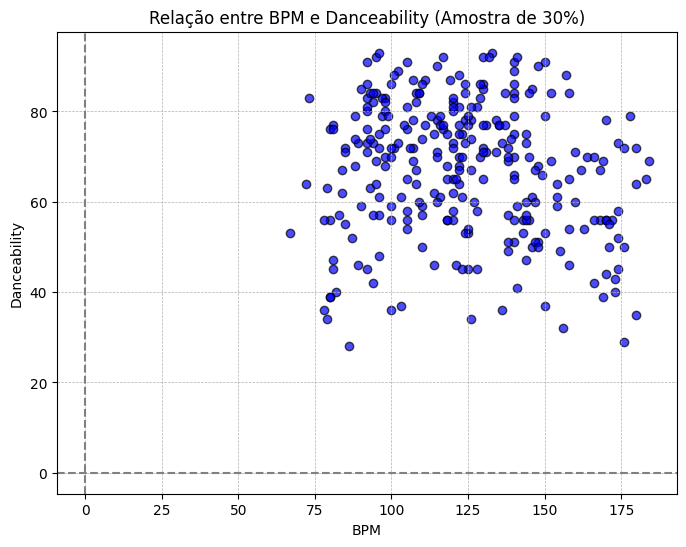

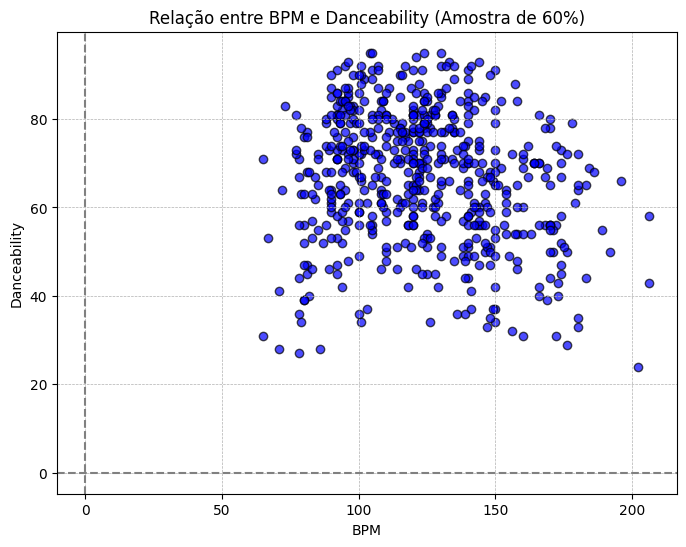

In [ ]:
danceability = data_set['danceability_%'].dropna()
bpm = data_set['bpm'].dropna()

# Dividindo as amostras em 30% e 60%
sample_30_danceability = danceability.sample(frac=0.3, random_state=0)
sample_30_bpm = bpm.sample(frac=0.3, random_state=0)

sample_60_danceability = danceability.sample(frac=0.6, random_state=0)
sample_60_bpm = bpm.sample(frac=0.6, random_state=0)

# Realizando o Teste de Correlação de Pearson para a amostra de 30%
stat_30, p_30 = pearsonr(sample_30_bpm, sample_30_danceability)
# Realizando o Teste de Correlação de Pearson para a amostra de 60%
stat_60, p_60 = pearsonr(sample_60_bpm, sample_60_danceability)

# Exibindo os resultados da correlação
print(f'Amostra de 30% - Correlação: stat={stat_30:.3f}, p-value={p_30:.3f}')
print(f'Amostra de 60% - Correlação: stat={stat_60:.3f}, p-value={p_60:.3f}')

# Plotando a relação para a amostra de 30%
plt.figure(figsize=(8, 6))
plt.scatter(sample_30_bpm, sample_30_danceability, alpha=0.7, color='blue', edgecolor='black')
plt.title('Relação entre BPM e Danceability (Amostra de 30%)')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plotando a relação para a amostra de 60%
plt.figure(figsize=(8, 6))
plt.scatter(sample_60_bpm, sample_60_danceability, alpha=0.7, color='blue', edgecolor='black')
plt.title('Relação entre BPM e Danceability (Amostra de 60%)')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### **Pairplot:**
O pairplot apresenta as distribuições individuais de BPM e Danceability e a correlação entre essas variáveis nas amostras de 30% e 60%. Ele confirma visualmente a ausência de uma correlação forte, pois os pontos estão dispersos, e as distribuições mostram que a maioria das músicas tem Danceability entre 60-80, enquanto BPM se concentra entre 100-150.

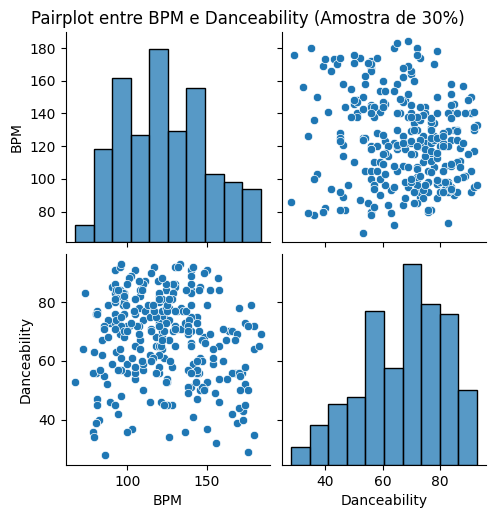

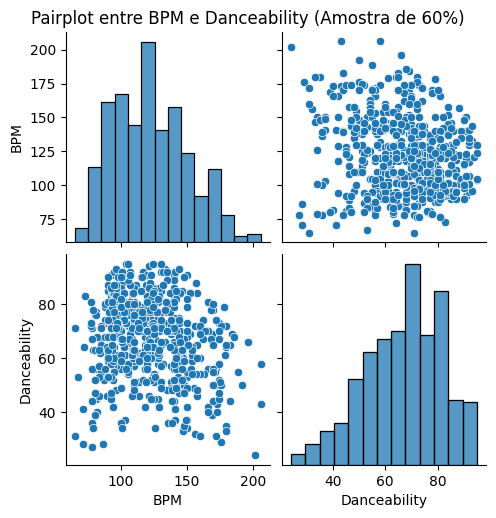

In [ ]:
# Criando DataFrames para as amostras de 30% e 60%
df_30 = pd.DataFrame({
    'BPM': sample_30_bpm,
    'Danceability': sample_30_danceability
})

df_60 = pd.DataFrame({
    'BPM': sample_60_bpm,
    'Danceability': sample_60_danceability
})

# Plotando o pairplot para a amostra de 30%
sns.pairplot(df_30)
plt.suptitle('Pairplot entre BPM e Danceability (Amostra de 30%)', y=1.02)
plt.show()

# Plotando o pairplot para a amostra de 60%
sns.pairplot(df_60)
plt.suptitle('Pairplot entre BPM e Danceability (Amostra de 60%)', y=1.02)
plt.show()

### **Densidade Bivariada:**

 O gráfico de densidade bivariada destaca as áreas de maior concentração de pontos entre BPM e Danceability. A maioria das músicas nas amostras se encontra em faixas de BPM entre 100-140 e Danceability entre 60-80. A densidade sugere que essas faixas são as mais comuns, mas a relação entre as duas variáveis é fraca, sem um padrão claro.

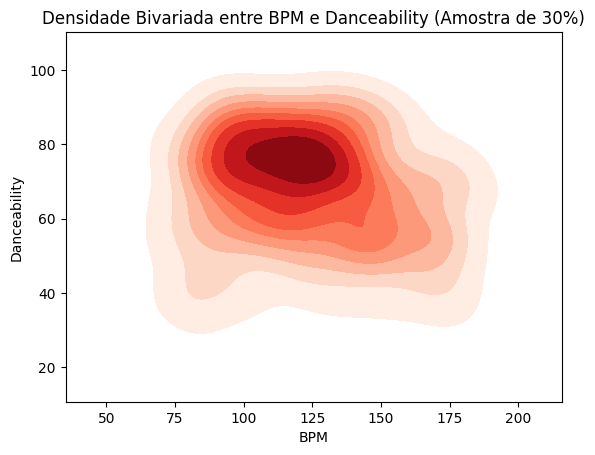

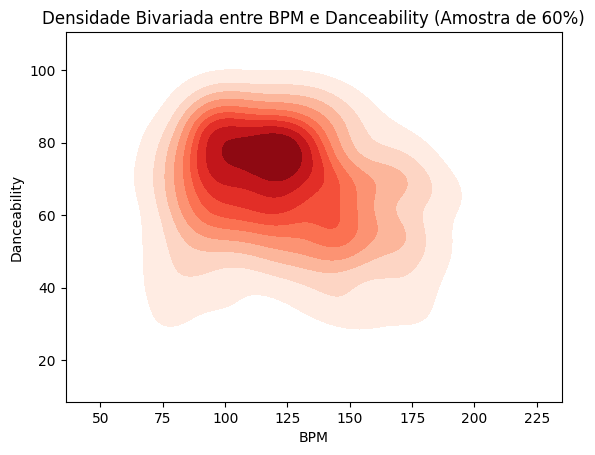

In [ ]:
# Plotando a Densidade Bivariada para a amostra de 30%
sns.kdeplot(x=sample_30_bpm, y=sample_30_danceability, fill=True, cmap="Reds")
plt.title('Densidade Bivariada entre BPM e Danceability (Amostra de 30%)')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.show()

# Plotando a Densidade Bivariada para a amostra de 60%
sns.kdeplot(x=sample_60_bpm, y=sample_60_danceability, fill=True, cmap="Reds")
plt.title('Densidade Bivariada entre BPM e Danceability (Amostra de 60%)')
plt.xlabel('BPM')
plt.ylabel('Danceability')
plt.show()

### **Regressão Linear:**

O gráfico de regressão linear mostra a linha de tendência entre BPM e Danceability. A linha levemente inclinada para baixo indica uma correlação negativa fraca. O intervalo de confiança (95%) ao redor da linha mostra uma grande incerteza, sugerindo que a relação entre essas variáveis não é significativa nas amostras de 30% e 60%.

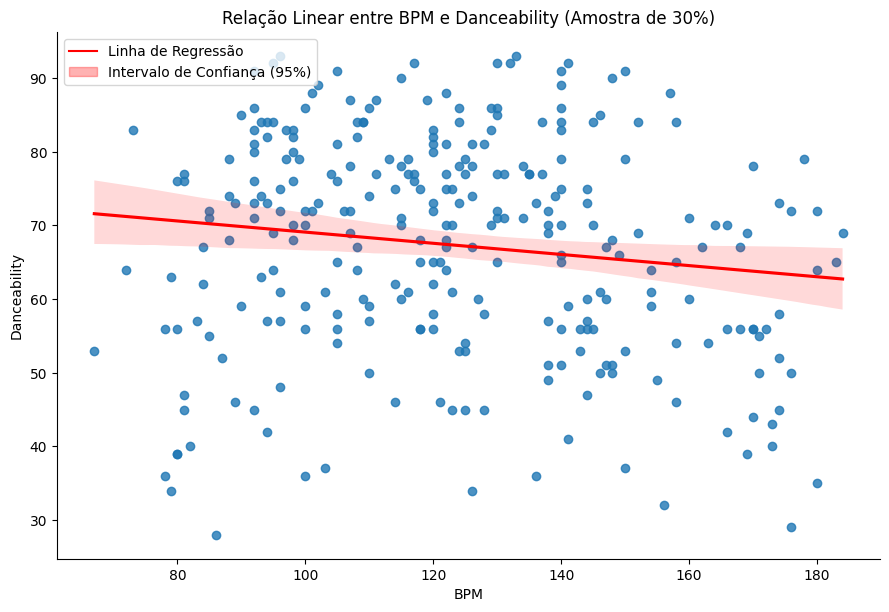

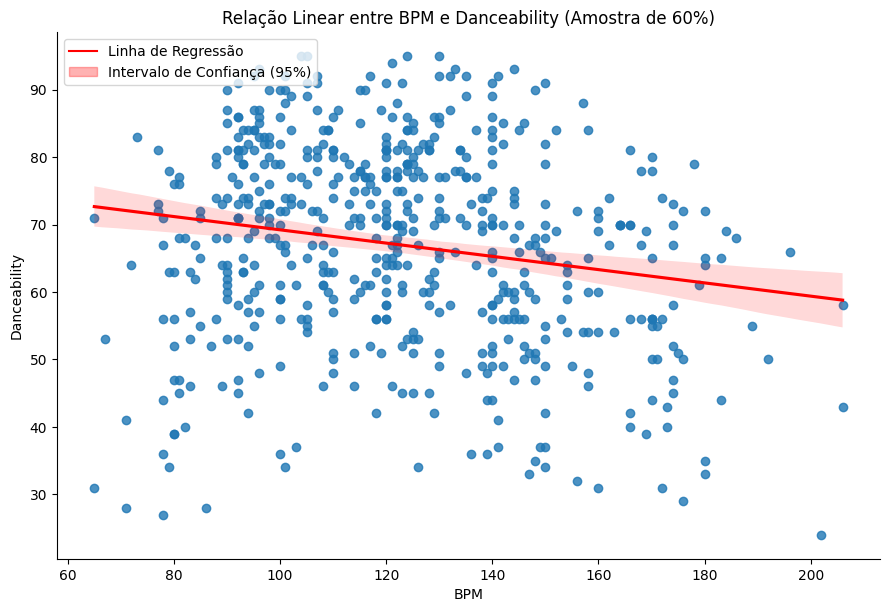

In [ ]:
# Criando DataFrame para as amostras de 30% e 60%
df_30 = pd.DataFrame({
    'BPM': sample_30_bpm,
    'Danceability': sample_30_danceability
})

df_60 = pd.DataFrame({
    'BPM': sample_60_bpm,
    'Danceability': sample_60_danceability
})

# Plotando a relação linear com a linha de regressão para a amostra de 30%
sns.lmplot(x='BPM', y='Danceability', data=df_30, height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title('Relação Linear entre BPM e Danceability (Amostra de 30%)')
plt.plot([], [], 'r-', label='Linha de Regressão')  # Legenda para a linha de regressão
plt.fill_between([], [], [], color='red', alpha=0.3, label='Intervalo de Confiança (95%)')  # Legenda para o sombreamento
plt.legend(loc='upper left')
plt.show()

# Plotando a relação linear com a linha de regressão para a amostra de 60%
sns.lmplot(x='BPM', y='Danceability', data=df_60, height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title('Relação Linear entre BPM e Danceability (Amostra de 60%)')
plt.plot([], [], 'r-', label='Linha de Regressão')  # Legenda para a linha de regressão
plt.fill_between([], [], [], color='red', alpha=0.3, label='Intervalo de Confiança (95%)')  # Legenda para o sombreamento
plt.legend(loc='upper left')
plt.show()

### **Conclusão:**



# **Teste T Student**

Para realizar o Teste T de Student entre duas amostras e interpretar os resultados considerando as hipóteses estabelecidas, é importante seguir os passos abaixo. O Teste T de Student é particularmente útil para comparar as médias de duas amostras independentes, especialmente quando estas são pequenas (n < 30) e presumivelmente distribuídas de forma normal.

**Estatística t (stat):**

*   Para a amostra de 30%, o valor da estatística t foi -30.67.
*   Para a amostra de 60%, o valor da estatística t foi -42.39.

Esses valores negativos indicam que há uma diferença significativa entre as médias das variáveis "danceability" e "bpm".

Quanto maior o valor absoluto da estatística t, maior é a diferença entre as duas variáveis em relação à variação observada nas amostras.

**p-value:**

**Para a amostra de 30%, o valor p foi 1.00e-122, e para a amostra de 60%, foi 1.28e-236.**

Esses valores são extremamente baixos (praticamente 0), muito abaixo do nível de significância convencional de 0.05. Isso significa que podemos rejeitar a hipótese nula em ambos os casos, o que indica que há uma diferença significativa entre as médias de "danceability" e "bpm" para essas amostras.

Para realizar o Teste T de Student, é necessário comparar as médias de duas amostras independentes, verificando se existe uma diferença significativa entre elas. Se o p-valor for menor que 0.05, rejeitamos a hipótese nula (H0), indicando uma diferença significativa. No caso das amostras de "danceability" e "bpm" do Spotify 2023, as análises estatísticas (com valores-p extremamente baixos) indicaram uma diferença significativa entre essas variáveis em ambas as amostras de 30% e 60%. Os gráficos das distribuições mostram que "danceability" se concentra entre 60 e 80, enquanto "bpm" varia de 80 a 180 no gráfico de 30% e até 200 no de 60%. Isso evidencia que as distribuições dessas variáveis são diferentes, confirmando os resultados do Teste T. Com base nos valores de estatística t e p-value, podemos concluir que há uma diferença significativa entre "danceability" e "bpm", indicando que essas variáveis afetam de maneira distinta o ritmo e a energia das músicas no Spotify.

Teste de 30% - stat=30.668, p-value=0.000
Há uma diferença significativa para 30%, BPM está diretamente ligado à maior danceability
Teste de 60% - stat=42.385, p-value=0.000
Há uma diferença significativa para 60%, BPM está diretamente ligado à maior danceability


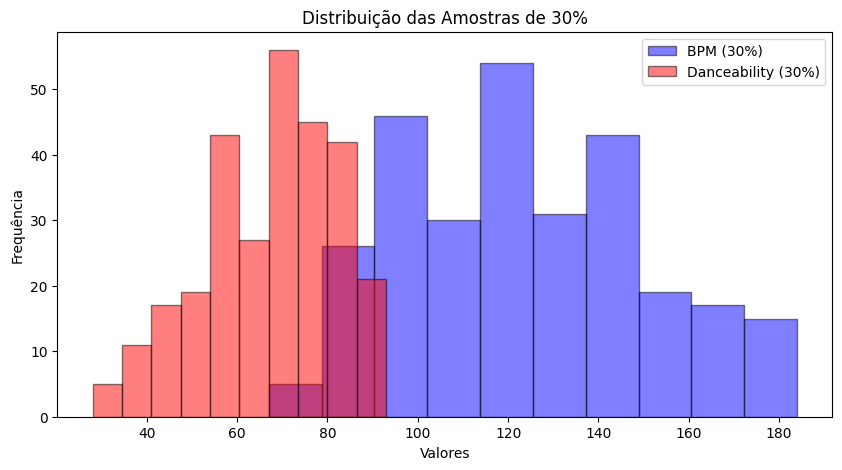

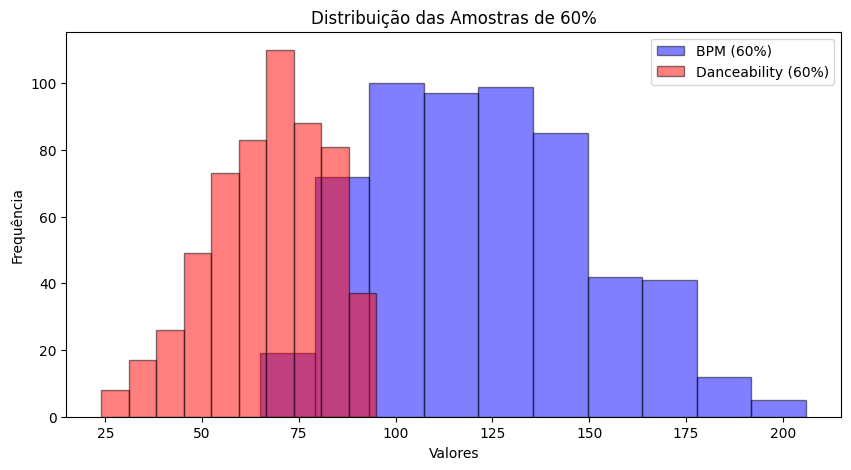

In [ ]:
# Seleção das variáveis de interesse: 'danceability_%' e 'bpm'
danceability = data_set['danceability_%']
bpm = data_set['bpm']

# Remover valores NaN para evitar erros no cálculo
danceability = danceability.dropna()
bpm = bpm.dropna()

# Dividindo as amostras com 30% e 60% de dados
sample_30_danceability = danceability.sample(frac=0.3, random_state=0)
sample_30_bpm = bpm.sample(frac=0.3, random_state=0)

sample_60_danceability = danceability.sample(frac=0.6, random_state=0)
sample_60_bpm = bpm.sample(frac=0.6, random_state=0)

# Hipótese: Maior BPM está associado a uma maior danceability
# Realizando o Teste T de Student para verificar se o BPM influencia a danceability
stat_30, p_30 = ttest_ind(sample_30_bpm, sample_30_danceability)
stat_60, p_60 = ttest_ind(sample_60_bpm, sample_60_danceability)

# Interpretando o resultado para as amostras de 30%
print(f'Teste de 30% - stat={stat_30:.3f}, p-value={p_30:.3f}')
if p_30 > 0.05:
    print('Não há diferença significativa para 30%, BPM não está diretamente ligado à maior danceability')
else:
    print('Há uma diferença significativa para 30%, BPM está diretamente ligado à maior danceability')

# Interpretando o resultado para as amostras de 60%
print(f'Teste de 60% - stat={stat_60:.3f}, p-value={p_60:.3f}')
if p_60 > 0.05:
    print('Não há diferença significativa para 60%, BPM não está diretamente ligado à maior danceability')
else:
    print('Há uma diferença significativa para 60%, BPM está diretamente ligado à maior danceability')

# Plotando as distribuições para as amostras de 30%
plt.figure(figsize=(10, 5))
plt.hist(sample_30_bpm, alpha=0.5, label='BPM (30%)', color='blue', edgecolor='black')
plt.hist(sample_30_danceability, alpha=0.5, label='Danceability (30%)', color='red', edgecolor='black')
plt.title('Distribuição das Amostras de 30%')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Plotando as distribuições para as amostras de 60%
plt.figure(figsize=(10, 5))
plt.hist(sample_60_bpm, alpha=0.5, label='BPM (60%)', color='blue', edgecolor='black')
plt.hist(sample_60_danceability, alpha=0.5, label='Danceability (60%)', color='red', edgecolor='black')
plt.title('Distribuição das Amostras de 60%')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# **Teste ANOVA**

### **Gráficos de Distribuição:**

**Distribuição das Amostras de BPM:**


*   A distribuição mostra que as músicas com BPM entre 100 e 150 predominam, com um pico na faixa de 120-130 BPM.
*   Músicas com BPM abaixo de 100 e acima de 150 são menos frequentes, mas ainda mostram uma distribuição clara.


**Distribuição das Amostras de Danceability:**


*   A distribuição de Danceability mostra uma maior concentração de músicas com valores altos de "dançabilidade" (entre 60 e 90), especialmente na faixa de BPM entre 100-150.
*   Músicas com BPM abaixo de 100 têm menores valores de "dançabilidade", sugerindo que músicas mais lentas tendem a ser menos dançáveis.
*   Músicas com BPM acima de 150 também apresentam uma "dançabilidade" mais baixa, o que indica que músicas muito rápidas também são menos dançáveis.

**Ou seja**, tanto o BPM quanto a Danceability mostram diferenças significativas entre os grupos. Músicas com BPM na faixa intermediária (100-150) tendem a ser mais dançáveis, enquanto as músicas mais lentas e mais rápidas são menos dançáveis.

ANOVA - BPM
Estatística de teste F: 1972.178
Valor-p: 0.000
Rejeitamos a hipótese nula. Pelo menos uma das médias de BPM difere significativamente.

ANOVA - Danceability
Estatística de teste F: 29.232
Valor-p: 0.000
Rejeitamos a hipótese nula. Pelo menos uma das médias de Danceability difere significativamente.


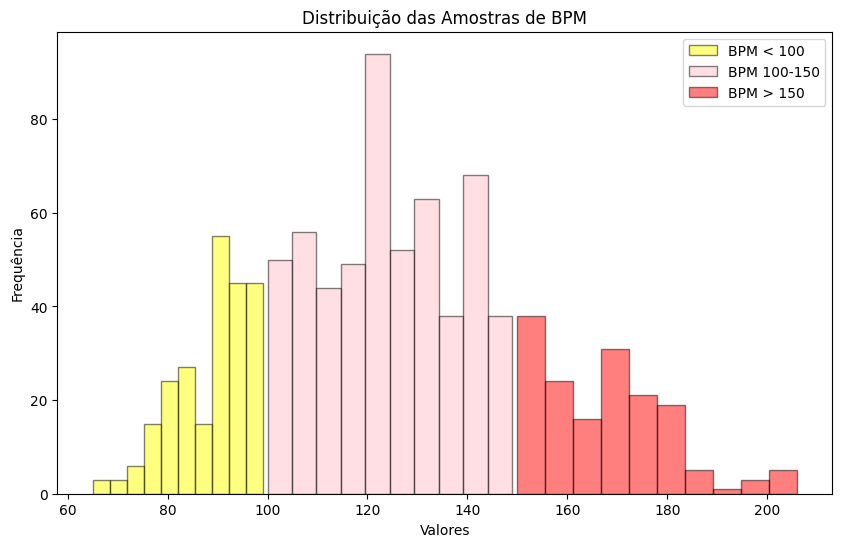

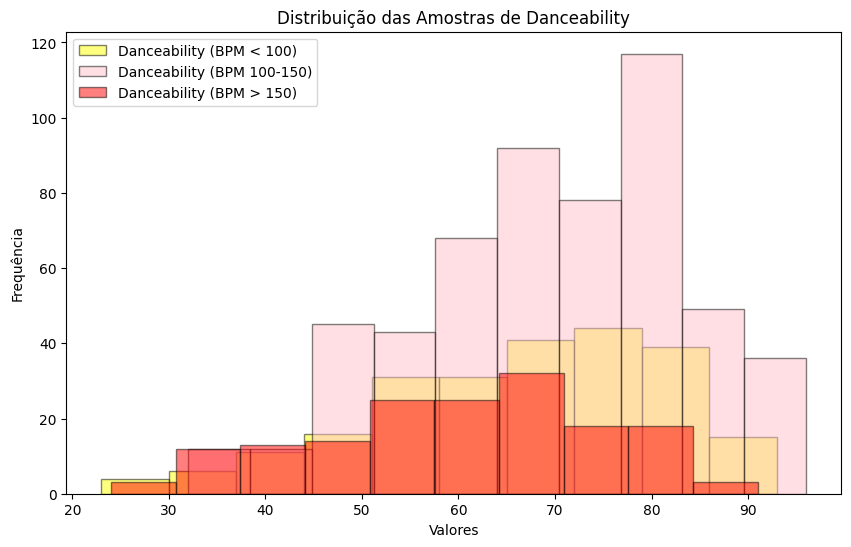

In [ ]:
# Selecionando as variáveis de interesse: 'danceability_%' e 'bpm'
danceability = data_set['danceability_%']
bpm = data_set['bpm']

# Remover valores NaN para evitar erros
danceability = danceability.dropna()
bpm = bpm.dropna()

# Dividindo o dataset em três grupos (baseados em bpm)
group1_bpm = bpm[bpm < 100]
group2_bpm = bpm[(bpm >= 100) & (bpm < 150)]
group3_bpm = bpm[bpm >= 150]

group1_dance = danceability[bpm < 100]
group2_dance = danceability[(bpm >= 100) & (bpm < 150)]
group3_dance = danceability[bpm >= 150]

# Executando o teste ANOVA para BPM
stat_bpm, p_bpm = f_oneway(group1_bpm, group2_bpm, group3_bpm)

# Exibindo os resultados do teste ANOVA para BPM
print("ANOVA - BPM")
print("Estatística de teste F: {:.3f}".format(stat_bpm))
print("Valor-p: {:.3f}".format(p_bpm))

if p_bpm < 0.05:
    print("Rejeitamos a hipótese nula. Pelo menos uma das médias de BPM difere significativamente.")
else:
    print("Não rejeitamos a hipótese nula. As médias dos grupos de BPM são provavelmente iguais.")

# Executando o teste ANOVA para Danceability
stat_dance, p_dance = f_oneway(group1_dance, group2_dance, group3_dance)

# Exibindo os resultados do teste ANOVA para Danceability
print("\nANOVA - Danceability")
print("Estatística de teste F: {:.3f}".format(stat_dance))
print("Valor-p: {:.3f}".format(p_dance))

if p_dance < 0.05:
    print("Rejeitamos a hipótese nula. Pelo menos uma das médias de Danceability difere significativamente.")
else:
    print("Não rejeitamos a hipótese nula. As médias dos grupos de Danceability são provavelmente iguais.")

# Plotando as distribuições das amostras de BPM
plt.figure(figsize=(10, 6))
plt.hist(group1_bpm, alpha=0.5, label='BPM < 100', color='yellow', edgecolor='black')
plt.hist(group2_bpm, alpha=0.5, label='BPM 100-150', color='pink', edgecolor='black')
plt.hist(group3_bpm, alpha=0.5, label='BPM > 150', color='red', edgecolor='black')
plt.title('Distribuição das Amostras de BPM')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Plotando as distribuições das amostras de Danceability
plt.figure(figsize=(10, 6))
plt.hist(group1_dance, alpha=0.5, label='Danceability (BPM < 100)', color='yellow', edgecolor='black')
plt.hist(group2_dance, alpha=0.5, label='Danceability (BPM 100-150)', color='pink', edgecolor='black')
plt.hist(group3_dance, alpha=0.5, label='Danceability (BPM > 150)', color='red', edgecolor='black')
plt.title('Distribuição das Amostras de Danceability')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### **Código alternativo com o teste Kruskal-Wallis (para amostras não normalmente distribuídas)**

## **Kruskal-Wallis para BPM:**
* Estatística de teste H: 747.634
* *alor-p: 0.000

O teste Kruskal-Wallis rejeita a hipótese nula, indicando que as distribuições de BPM entre os três grupos (<100, 100-150, >150) são significativamente diferentes. Isso é consistente com o resultado obtido no teste ANOVA, onde também foi identificado que pelo menos uma das médias dos grupos de BPM difere significativamente.

## **Kruskal-Wallis para Danceability:**
* Estatística de teste H: 50.880
* Valor-p: 0.000

Para Danceability, o teste Kruskal-Wallis também rejeita a hipótese nula, sugerindo que as distribuições de "dançabilidade" entre os grupos de BPM são significativamente diferentes. Esse resultado também é coerente com o obtido no ANOVA, onde as médias de Danceability também foram consideradas significativamente diferentes entre os grupos de BPM.

Kruskal-Wallis - BPM
Estatística de teste H: 747.634
Valor-p: 0.000
Rejeitamos a hipótese nula. Pelo menos uma das médias de BPM difere significativamente.

Kruskal-Wallis - Danceability
Estatística de teste H: 50.880
Valor-p: 0.000
Rejeitamos a hipótese nula. Pelo menos uma das médias de Danceability difere significativamente.


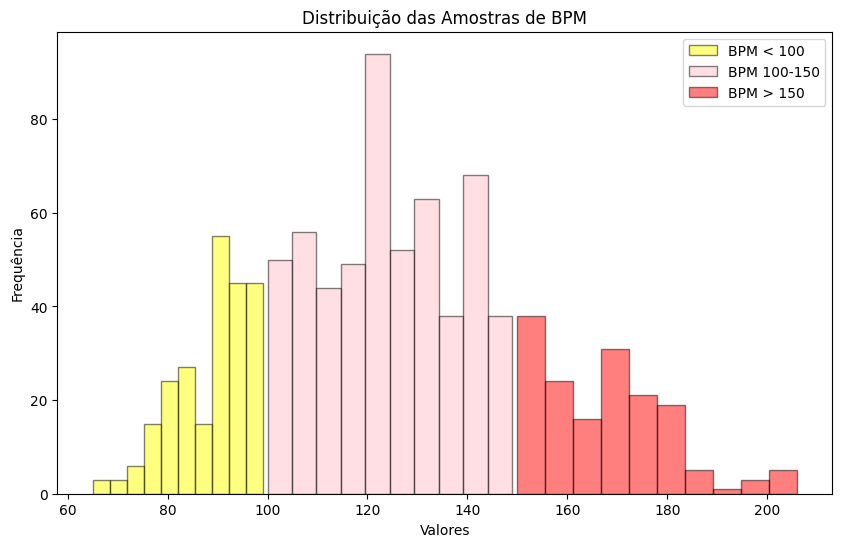

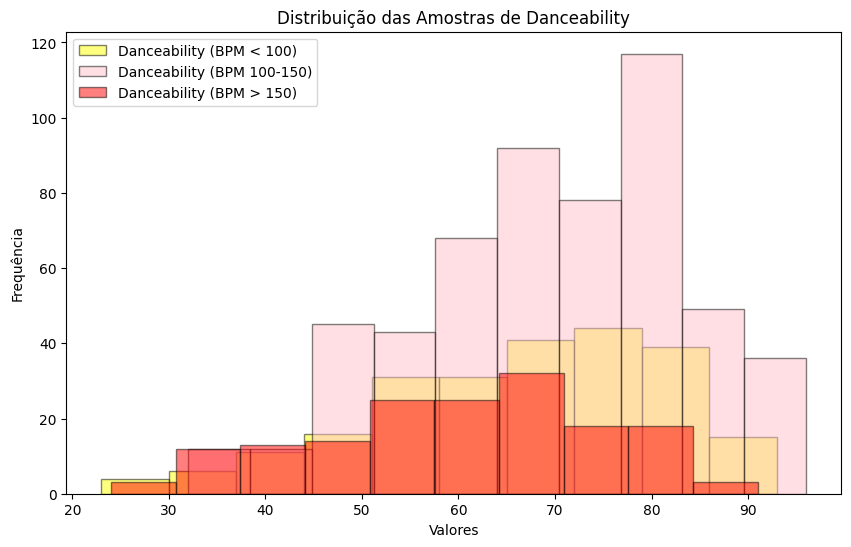

In [ ]:
# Selecionando as variáveis de interesse: 'danceability_%' e 'bpm'
danceability = data_set['danceability_%']
bpm = data_set['bpm']

# Remover valores NaN para evitar erros
danceability = danceability.dropna()
bpm = bpm.dropna()

# Dividindo o dataset em três grupos (baseados em bpm)
group1_bpm = bpm[bpm < 100]
group2_bpm = bpm[(bpm >= 100) & (bpm < 150)]
group3_bpm = bpm[bpm >= 150]

group1_dance = danceability[bpm < 100]
group2_dance = danceability[(bpm >= 100) & (bpm < 150)]
group3_dance = danceability[bpm >= 150]

# Executando o teste Kruskal-Wallis para BPM
stat_bpm, p_bpm = kruskal(group1_bpm, group2_bpm, group3_bpm)

# Exibindo os resultados do teste Kruskal-Wallis para BPM
print("Kruskal-Wallis - BPM")
print("Estatística de teste H: {:.3f}".format(stat_bpm))
print("Valor-p: {:.3f}".format(p_bpm))

if p_bpm < 0.05:
    print("Rejeitamos a hipótese nula. Pelo menos uma das médias de BPM difere significativamente.")
else:
    print("Não rejeitamos a hipótese nula. As médias dos grupos de BPM são provavelmente iguais.")

# Executando o teste Kruskal-Wallis para Danceability
stat_dance, p_dance = kruskal(group1_dance, group2_dance, group3_dance)

# Exibindo os resultados do teste Kruskal-Wallis para Danceability
print("\nKruskal-Wallis - Danceability")
print("Estatística de teste H: {:.3f}".format(stat_dance))
print("Valor-p: {:.3f}".format(p_dance))

if p_dance < 0.05:
    print("Rejeitamos a hipótese nula. Pelo menos uma das médias de Danceability difere significativamente.")
else:
    print("Não rejeitamos a hipótese nula. As médias dos grupos de Danceability são provavelmente iguais.")

# Plotando as distribuições das amostras de BPM
plt.figure(figsize=(10, 6))
plt.hist(group1_bpm, alpha=0.5, label='BPM < 100', color='yellow', edgecolor='black')
plt.hist(group2_bpm, alpha=0.5, label='BPM 100-150', color='pink', edgecolor='black')
plt.hist(group3_bpm, alpha=0.5, label='BPM > 150', color='red', edgecolor='black')
plt.title('Distribuição das Amostras de BPM')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Plotando as distribuições das amostras de Danceability
plt.figure(figsize=(10, 6))
plt.hist(group1_dance, alpha=0.5, label='Danceability (BPM < 100)', color='yellow', edgecolor='black')
plt.hist(group2_dance, alpha=0.5, label='Danceability (BPM 100-150)', color='pink', edgecolor='black')
plt.hist(group3_dance, alpha=0.5, label='Danceability (BPM > 150)', color='red', edgecolor='black')
plt.title('Distribuição das Amostras de Danceability')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### **Conclusão:**
Esses dois testes (ANOVA e Kruskal-Wallis) são úteis para verificar se há diferenças significativas entre os grupos de BPM e como isso pode impactar a danceability. O ANOVA assume normalidade, enquanto o Kruskal-Wallis é mais adequado para dados não paramétricos.

Seus resultados de Kruskal-Wallis confirmam os achados do ANOVA, mostrando que os grupos de BPM e Danceability possuem diferenças significativas. Portanto, mesmo quando usamos um teste que não depende da suposição de normalidade (Kruskal-Wallis), as diferenças entre as faixas de BPM e seus efeitos na dançabilidade das músicas continuam sendo evidentes.